# Classifying Customer Complaints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

## Download data from https://data.consumerfinance.gov/dataset/Consumer-Complaints/s6ew-h6mp

In [2]:
df = pd.read_csv('Consumer_Complaints.csv')
df.head()

C:\Users\shwet\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,5,6,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,02/15/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,NaN,Company believes the complaint is the result o...,"CCS Financial Services, Inc.",MA,010XX,NaN,Consent not provided,Web,02/15/2019,Closed with explanation,Yes,NaN,3152882
1,02/15/2019,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,NaN,NaN,"Diversified Consultants, Inc.",SC,294XX,NaN,NaN,Web,02/15/2019,In progress,Yes,NaN,3153515
2,02/15/2019,Debt collection,Federal student loan debt,False statements or representation,Attempted to collect wrong amount,NaN,NaN,AES/PHEAA,CA,917XX,NaN,NaN,Web,02/15/2019,Closed with explanation,Yes,NaN,3152870
3,02/15/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"Federal Adjustment Bureau, Inc.",FL,347XX,NaN,NaN,Web,02/15/2019,In progress,Yes,NaN,3153133
4,02/15/2019,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Public record information inaccurate,NaN,NaN,STERLING INFOSYSTEMS INC,NC,275XX,Servicemember,NaN,Web,02/15/2019,In progress,Yes,NaN,3153315


In [3]:
df.shape

(1219000, 18)

## Discard the rows where consumer complaint narrative is blank. How many rows does this yield? 

In [4]:
print("Missing values in Consumer complaint narrative: {}".format((df['Consumer complaint narrative'].isnull() | 
                                                                   df['Consumer complaint narrative'].isna()).sum()))

Missing values in Consumer complaint narrative: 851832


In [5]:
df_new = df.dropna(subset=['Consumer complaint narrative'])
print(df_new.shape)

(367168, 18)


After deleting the rows where consumer complaint narrative is blank, we get 367168 rows.

In [6]:
df_new.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
371,02/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,All accounts have been paid in full and are no...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",TN,371XX,NaN,Consent provided,Web,02/10/2019,Closed with explanation,Yes,NaN,3148129
418,02/09/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,A message from Harris Debt collection at phone...,Company believes it acted appropriately as aut...,"Harris & Harris, Ltd.",IA,NaN,NaN,Consent provided,Web,02/09/2019,Closed with explanation,Yes,NaN,3147588
623,02/08/2019,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,I checked my credit report this year to see th...,Company believes it acted appropriately as aut...,Millco Management,MD,212XX,NaN,Consent provided,Web,02/08/2019,Closed with explanation,Yes,NaN,3146689
692,02/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,XXXX credit card with Citibank is reporting me...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,104XX,NaN,Consent provided,Web,02/07/2019,Closed with non-monetary relief,Yes,NaN,3145725
849,02/07/2019,Credit card or prepaid card,Store credit card,Problem when making payments,You never received your bill or did not know a...,Attempted to contact creditor after discharge ...,Company has responded to the consumer and the ...,Army and Air Force Exchange Service,CT,06237,Servicemember,Consent provided,Web,02/07/2019,Closed with explanation,Yes,NaN,3145730


## Draw a histogram of number of complaints by company name. What can you conclude about which institutions are causing the most complaints?

In [7]:
df_complaint_by_company = df_new.groupby(['Company'])['Date received'].count().reset_index()
df_complaint_by_company.rename(columns={'Date received': 'Count'}, inplace=True)
df_complaint_by_company = df_complaint_by_company.sort_values('Count', ascending=False)
df_complaint_by_company

,Company,Count
1280,"EQUIFAX, INC.",36535
1377,Experian Information Solutions Inc.,29947
3630,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",29038
3947,WELLS FARGO & COMPANY,13556
691,"CITIBANK, N.A.",13001
462,"BANK OF AMERICA, NATIONAL ASSOCIATION",12908
1991,JPMORGAN CHASE & CO.,12307
2655,"Navient Solutions, LLC.",12043
633,CAPITAL ONE FINANCIAL CORPORATION,9603
3364,SYNCHRONY FINANCIAL,6653


In [9]:
df_complaint_by_company_new = df_complaint_by_company[df_complaint_by_company['Count']>100]
df_complaint_by_company_new.shape

(287, 2)

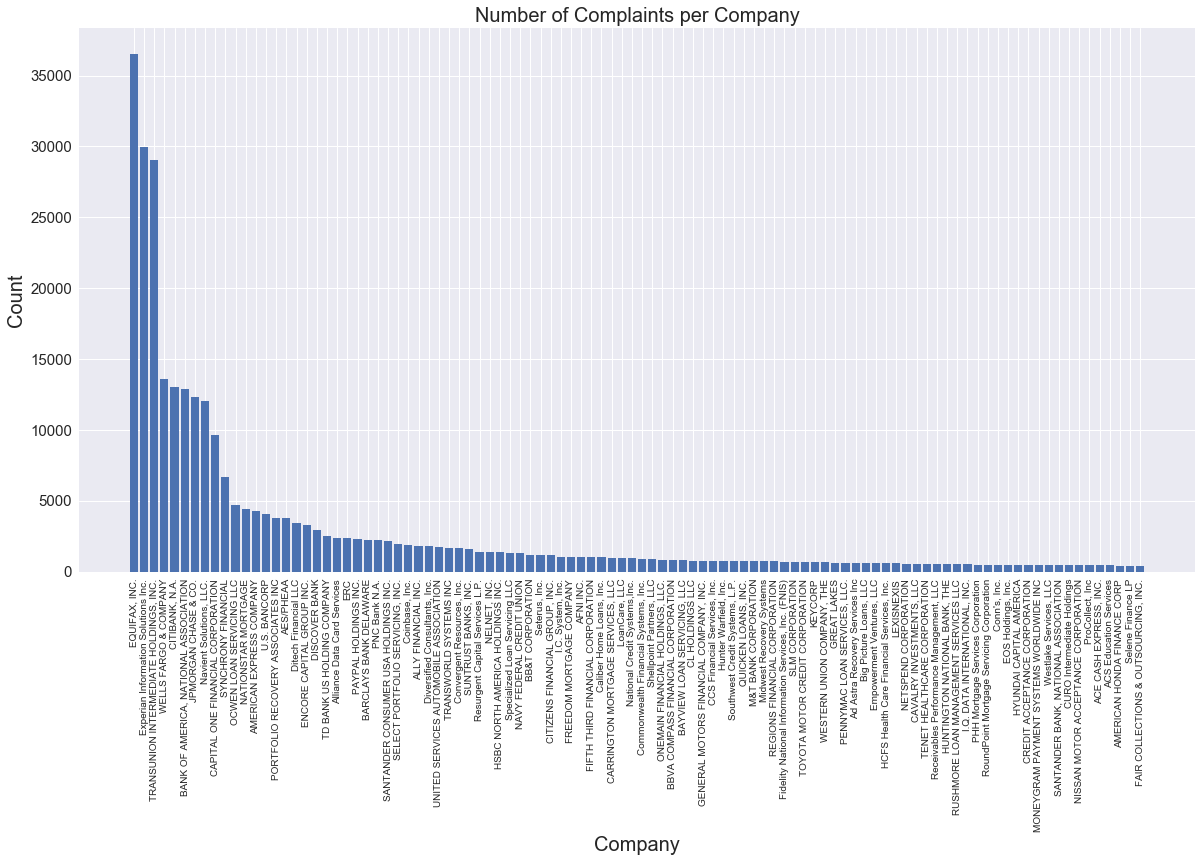

In [10]:
df_complaint_by_company_head = df_complaint_by_company.head(100)
xs = df_complaint_by_company_head['Company']
ys = df_complaint_by_company_head['Count']
plt.style.use('seaborn')
plt.figure(figsize=(20,10))
plt.bar(xs,ys)
plt.xticks(rotation=90, fontsize = 10)
plt.yticks(fontsize = 15)
plt.title('Number of Complaints per Company', fontsize = 20)
plt.xlabel('Company', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.show()

Institutions causing maximum complaints are mostly consumer centric companies and banks - EquiFax Inc, Experian Information Solutions Inc, Transunion Intermediate Holdings Inc, Wells Fargo & Company, Citibank NA, Bank of America National Association, JP Morgan Chase & Co etc. This tells us that these companies (that are consumer centric) are causing maximum complaints. I've plotted the top 100 for better readability.

## Create a model to predict the product based on the consumer complaint narrative. What modeling techniques could you use? How accurate are your predictions for each field, and how did you evaluate this?

In [11]:
df_new1 = df_new.copy()
df_new1['Sub-product']=df_new1['Sub-product'].fillna('NA')
df_new1['Sub-issue']=df_new1['Sub-issue'].fillna('NA')
df_new1['Issue']=df_new1['Issue'].fillna('NA')
df_new1['category_id_prod'] = df_new1['Product'].factorize()[0]
df_new1['category_id_subprod'] = df_new1['Sub-product'].factorize()[0]
df_new1['category_id_issue'] = df_new1['Issue'].factorize()[0]
df_new1['category_id_subissue'] = df_new1['Sub-issue'].factorize()[0]
df_new1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,category_id_prod,category_id_subprod,category_id_issue,category_id_subissue
371,02/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,All accounts have been paid in full and are no...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",TN,371XX,...,Web,02/10/2019,Closed with explanation,Yes,NaN,3148129,0,0,0,0
418,02/09/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,A message from Harris Debt collection at phone...,Company believes it acted appropriately as aut...,"Harris & Harris, Ltd.",IA,NaN,...,Web,02/09/2019,Closed with explanation,Yes,NaN,3147588,1,1,1,1
623,02/08/2019,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,I checked my credit report this year to see th...,Company believes it acted appropriately as aut...,Millco Management,MD,212XX,...,Web,02/08/2019,Closed with explanation,Yes,NaN,3146689,1,2,2,2
692,02/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,XXXX credit card with Citibank is reporting me...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,104XX,...,Web,02/07/2019,Closed with non-monetary relief,Yes,NaN,3145725,0,0,3,3
849,02/07/2019,Credit card or prepaid card,Store credit card,Problem when making payments,You never received your bill or did not know a...,Attempted to contact creditor after discharge ...,Company has responded to the consumer and the ...,Army and Air Force Exchange Service,CT,06237,...,Web,02/07/2019,Closed with explanation,Yes,NaN,3145730,2,3,4,4


In [12]:
category_id_df = df_new1[['Product', 'category_id_prod']].drop_duplicates().sort_values('category_id_prod')
category_id_subprod_df = df_new1[['Sub-product', 'category_id_subprod']].drop_duplicates().sort_values('category_id_subprod')
category_id_issue_df = df_new1[['Issue', 'category_id_issue']].drop_duplicates().sort_values('category_id_issue')
category_id_subissue_df = df_new1[['Sub-issue', 'category_id_subissue']].drop_duplicates().sort_values('category_id_subissue')

In [13]:
import nltk
nltk.download('popular')

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\shwet\AppData\Roaming\nl

True

In [13]:
#Getting stop words and lemmatizing the text
import nltk
import collections as co

stopWords =co.Counter(nltk.corpus.stopwords.words())

In [14]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [15]:
df_new1['Narration_lemmatized'] = df_new1['Consumer complaint narrative'].apply(lemmatize_text)

In [16]:
#deleted unused data frames to free memory
del df
del df_new

In [17]:
df_new1['Narration_lemmatized_final'] = [' '.join(map(str, l)) for l in df_new1['Narration_lemmatized']]
df_new1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,...,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,category_id_prod,category_id_subprod,category_id_issue,category_id_subissue,Narration_lemmatized,Narration_lemmatized_final
371,02/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Account status incorrect,All accounts have been paid in full and are no...,Company has responded to the consumer and the ...,"Convergent Resources, Inc.",TN,371XX,...,Closed with explanation,Yes,NaN,3148129,0,0,0,0,"[All, account, have, been, paid, in, full, and...",All account have been paid in full and are not...
418,02/09/2019,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,A message from Harris Debt collection at phone...,Company believes it acted appropriately as aut...,"Harris & Harris, Ltd.",IA,NaN,...,Closed with explanation,Yes,NaN,3147588,1,1,1,1,"[A, message, from, Harris, Debt, collection, a...",A message from Harris Debt collection at phone...
623,02/08/2019,Debt collection,Medical debt,Written notification about debt,Didn't receive enough information to verify debt,I checked my credit report this year to see th...,Company believes it acted appropriately as aut...,Millco Management,MD,212XX,...,Closed with explanation,Yes,NaN,3146689,1,2,2,2,"[I, checked, my, credit, report, this, year, t...",I checked my credit report this year to see th...
692,02/07/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Problem with a credit reporting company's inve...,Difficulty submitting a dispute or getting inf...,XXXX credit card with Citibank is reporting me...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,104XX,...,Closed with non-monetary relief,Yes,NaN,3145725,0,0,3,3,"[XXXX, credit, card, with, Citibank, is, repor...",XXXX credit card with Citibank is reporting me...
849,02/07/2019,Credit card or prepaid card,Store credit card,Problem when making payments,You never received your bill or did not know a...,Attempted to contact creditor after discharge ...,Company has responded to the consumer and the ...,Army and Air Force Exchange Service,CT,06237,...,Closed with explanation,Yes,NaN,3145730,2,3,4,4,"[Attempted, to, contact, creditor, after, disc...",Attempted to contact creditor after discharge ...


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stopWords)
features = tfidf.fit_transform(df_new1['Narration_lemmatized_final'])

labels_prod = df_new1.category_id_prod
labels_supprod = df_new1.category_id_subprod
labels_issue = df_new1.category_id_issue
labels_subissue = df_new1.category_id_subissue

We can use multiple models like:
* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* SGDC Classifier

In [19]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels_prod, 
                                                                                 df_new1.index, test_size=0.33, random_state=0)

Checking the accuracy for all four to select the best one for my model.

In [20]:
#Logistic Regression
model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)

accuracy_score(y_pred,y_test)

0.7298334516283446

In [21]:
##Naive Bayes
model_NB = MultinomialNB()

model_NB.fit(X_train, y_train)
y_pred = model_NB.predict(X_test)

accuracy_score(y_pred,y_test)

0.580558902662463

In [22]:
##Linear Support Vector Classifier
model_SVC = LinearSVC()

model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)

accuracy_score(y_pred,y_test)

0.7324249376887906

In [23]:
#SGDC Classifier
model_SGD = SGDClassifier()

model_SGD.fit(X_train, y_train)
y_pred = model_SGD.predict(X_test)

accuracy_score(y_pred,y_test)

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.685522341250846

**The accuracy of our models is as follows:**
* Logistic Regression: 0.729
* (Multinomial) Naive Bayes: 0.580
* Linear Support Vector Machine: 0.732
* SGDC Classifier: 0.685

Since the accuracy of Linear Support Vector Machine Classifier is the maximum, I have used that to build my models for products, sub-products, issues and sub-issues.

The model is evaluated by building a term document matrix as features from the complaints received. Using these features,the model is trained on the training set and then, tested for accuracy on the test set.

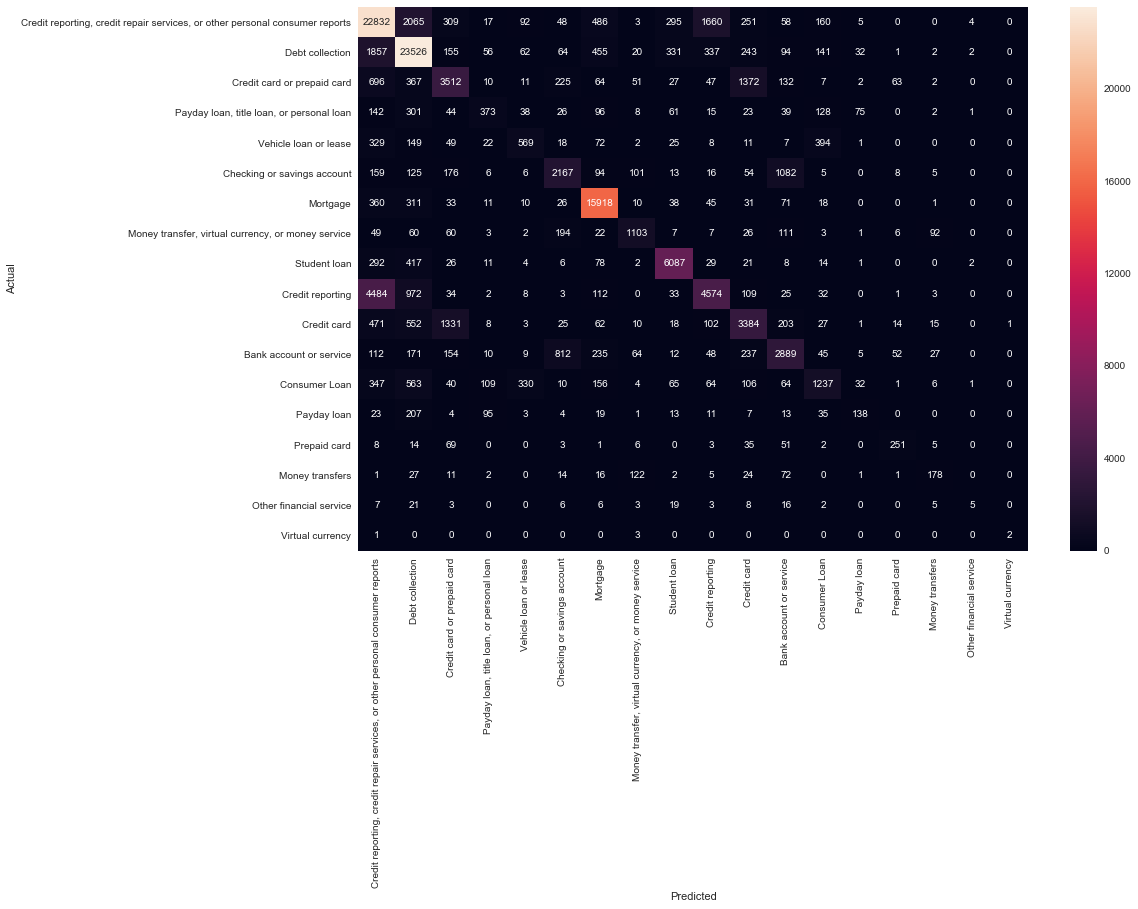

In [24]:
#Model to predict the product based on the consumer complaint narrative
y_pred = model_SVC.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(conf_mat, annot=True, fmt='d',xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [25]:
from sklearn import metrics
print('Accuracy: ', accuracy_score(y_pred,y_test))
print(metrics.classification_report(y_test, y_pred, target_names=df_new1['Product'].unique()))

Accuracy:  0.7324249376887906
                                                                              precision    recall  f1-score   support

Credit reporting, credit repair services, or other personal consumer reports       0.71      0.81      0.76     28285
                                                             Debt collection       0.79      0.86      0.82     27378
                                                 Credit card or prepaid card       0.58      0.53      0.56      6588
                                   Payday loan, title loan, or personal loan       0.51      0.27      0.35      1372
                                                       Vehicle loan or lease       0.50      0.34      0.41      1656
                                                 Checking or savings account       0.59      0.54      0.57      4017
                                                                    Mortgage       0.89      0.94      0.92     16883
                         

## Answer the questions in #4 for subproduct, issue-and sub-issue

In [26]:
#Sub-product
model_sp = LinearSVC()
X_train_sp, X_test_sp, y_train_sp, y_test_sp, indices_train_sp, indices_test_sp = train_test_split(features, labels_supprod, 
                                                                                 df_new1.index, test_size=0.33, random_state=0)
model_sp.fit(X_train_sp, y_train_sp)
y_pred_sp = model_sp.predict(X_test_sp)

print('Accuracy Score for Sub-Products: ', accuracy_score(y_pred_sp,y_test_sp))

Accuracy Score for Sub-Products:  0.5379892048924616


In [27]:
target_names = df_new1['Sub-product'].unique()
print(metrics.classification_report(y_test_sp, y_pred_sp, target_names=target_names))

                                            precision    recall  f1-score   support

                          Credit reporting       0.65      0.84      0.73     27648
                             I do not know       0.45      0.53      0.49      5351
                              Medical debt       0.50      0.37      0.42      2448
                         Store credit card       0.43      0.23      0.30      1165
                               Payday loan       0.40      0.31      0.35      1157
                                Other debt       0.41      0.32      0.36      4115
General-purpose credit card or charge card       0.52      0.50      0.51      5001
                          Credit card debt       0.47      0.32      0.38      3083
                                      Loan       0.43      0.36      0.39      1380
                          Payday loan debt       0.35      0.18      0.24       536
                          Checking account       0.68      0.86      0.76  

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [28]:
#Issue
model_i = LinearSVC()
X_train_i, X_test_i, y_train_i, y_test_i, indices_train_i, indices_test_i = train_test_split(features, labels_issue, 
                                                                                 df_new1.index, test_size=0.33, random_state=0)
model_i.fit(X_train_i, y_train_i)
y_pred_i = model_i.predict(X_test_i)

print('Accuracy Score on Issues: ',accuracy_score(y_pred_i,y_test_i))

Accuracy Score on Issues:  0.4422940428833171


In [29]:
print(metrics.classification_report(y_test_i, y_pred_i, target_names=df_new1['Issue'].unique()))

                                                                                  precision    recall  f1-score   support

                                            Incorrect information on your report       0.51      0.68      0.58     14883
                                               Attempts to collect debt not owed       0.39      0.37      0.38      6046
                                                 Written notification about debt       0.44      0.32      0.37      2805
Problem with a credit reporting company's investigation into an existing problem       0.49      0.47      0.48      7507
                                                    Problem when making payments       0.37      0.33      0.35       836
 Money was taken from your bank account on the wrong day or for the wrong amount       0.00      0.00      0.00        16
                                                           Communication tactics       0.47      0.64      0.54      3604
                       

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1428: UserWarning: labels size, 158, does not match size of target_names, 161
  .format(len(labels), len(target_names))
C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#Sub-issue
model_si = LinearSVC()
X_train_si, X_test_si, y_train_si, y_test_si, indices_train_si, indices_test_si = train_test_split(features, labels_subissue, 
                                                                                 df_new1.index, test_size=0.33, random_state=0)
model_si.fit(X_train_si, y_train_si)
y_pred_si = model_si.predict(X_test_si)

print('Accuracy Score on Sub-Issues: ',accuracy_score(y_pred_si,y_test_si))

Accuracy Score on Sub-Issues:  0.5171995444266544


In [31]:
print(metrics.classification_report(y_test_si, y_pred_si, target_names=df_new1['Sub-issue'].unique()))

                                                                                       precision    recall  f1-score   support

                                                             Account status incorrect       0.42      0.44      0.43      3434
                                                                    Debt is not yours       0.31      0.33      0.32      3232
                                     Didn't receive enough information to verify debt       0.37      0.30      0.33      1703
Difficulty submitting a dispute or getting information about a dispute over the phone       0.53      0.22      0.31       666
                       You never received your bill or did not know a payment was due       0.61      0.48      0.53       204
                                                                                   NA       0.67      0.92      0.77     36617
                                     Used obscene, profane, or other abusive language       0.32      0.18    

C:\Users\shwet\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


The accuracy of predictions is calculated by using accuracy_score and classification report. The classification report tells us the accuracy per field.